### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 7


### Дисциплина: Методы машинного обучения

##### Студент:  Генералов Даниил
##### Группа:   НПИбд-01-21

## Москва 2024
***

Вариант 4

1. Набор данных stl10 с изменением разрешения до 72x72

2. Классы с метками 1,3,5,7,9

3. Требования к архитектуре сети CNN:

Последовательный API с методом add() при создании

Функция потерь: категориальная кросс-энтропия

Кол-во сверточных слоев 5

Количество фильтров в сверточных слоях 8

Размеры фильтра 5х5

Использование слоев dropout

4. Требования к архитектуре сети трансформер:

Функция потерь: разреженная категориальная кросс-энтропия

6. Показатель качества многоклассовой классификации:

максимальная полнота классов, где полнота (recall) класса равна доле правильных предсказаний для всех точек, принадлежащих этому классу.

1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую, валидационную и тестовую выборки. Если при дальнейшей работе с данными возникнет нехватка вычислительных ресурсов, то разрешение изображений можно уменьшить.
2. Оставьте в наборе изображения, указанных в индивидуальном задании, и визуализируйте по одному изображению из каждого класса, подписывая изображение меткой класса.
3. Постройте нейронные сети различных архитектур (MLP, CNN, RNN, трансформер) для задачи многоклассовой классификации изображений (архитектуры и требования к сетям указаны в индивидуальном задании), используя функции потерь, указанные в индивидуальном задании. Подберите такие параметры, как функции активации, оптимизатор, начальная скорость обучения, размер мини-пакета и др. самостоятельно, обеспечивая обучение нейронных сетей. Обучайте нейронные сети с использованием валидационной выборки, сформированной в п. 1. Останавливайте переобучение нейронных сетей в случае роста потерь на валидационной выборке на нескольких эпохах обучения подряд.
4. Вычислите и выведите в отчете матрицы ошибок нейронных сетей (tf.math.confusion_matrix) для обучающей и тестовой выборок.
5. Визуализируйте кривые обучения построенных моделей для показателей потерь на обучающей и валидационной выборках на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительные потери (потери, деленные на начальные потери на первой эпохе).
6. Оцените качество многоклассовой классификации нейронными сетями на тестовой выборке при помощи показателя качества, указанного в индивидуальном задании, и выведите название нейронной сети с лучшим качеством.

# 1. датасет

In [5]:
# %pip install tfds-nightly
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install tensorflow==2.16.1
# %pip install tf-keras==2.16.0
# %pip install pillow
# %pip install tensorflow_model_analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import PIL

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1


In [6]:
ds_train, ds_test = tfds.load("stl10", split=["train", "test"])


In [7]:
df_train = tfds.as_dataframe(ds_train)
df_test_validation = tfds.as_dataframe(ds_test)

df_train.shape, df_test_validation.shape

((5000, 2), (8000, 2))

In [8]:
df_test = df_test_validation.sample(5000)
df_validation = df_test_validation.drop(df_test.index)

df_test.shape, df_validation.shape

((5000, 2), (3000, 2))

In [9]:
df_train.head()

,image,label
0,"[[[136, 144, 153], [125, 127, 136], [125, 126,...",1
1,"[[[70, 132, 186], [81, 139, 189], [143, 176, 2...",0
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",8
3,"[[[104, 90, 69], [101, 87, 66], [103, 88, 67],...",3
4,"[[[189, 204, 235], [189, 204, 235], [189, 204,...",9


In [10]:
train_images = df_train['image'].to_numpy()
train_labels = df_train['label'].to_numpy()
test_images = df_test['image'].to_numpy()
test_labels = df_test['label'].to_numpy()
validation_images = df_validation['image'].to_numpy()
validation_labels = df_validation['label'].to_numpy()

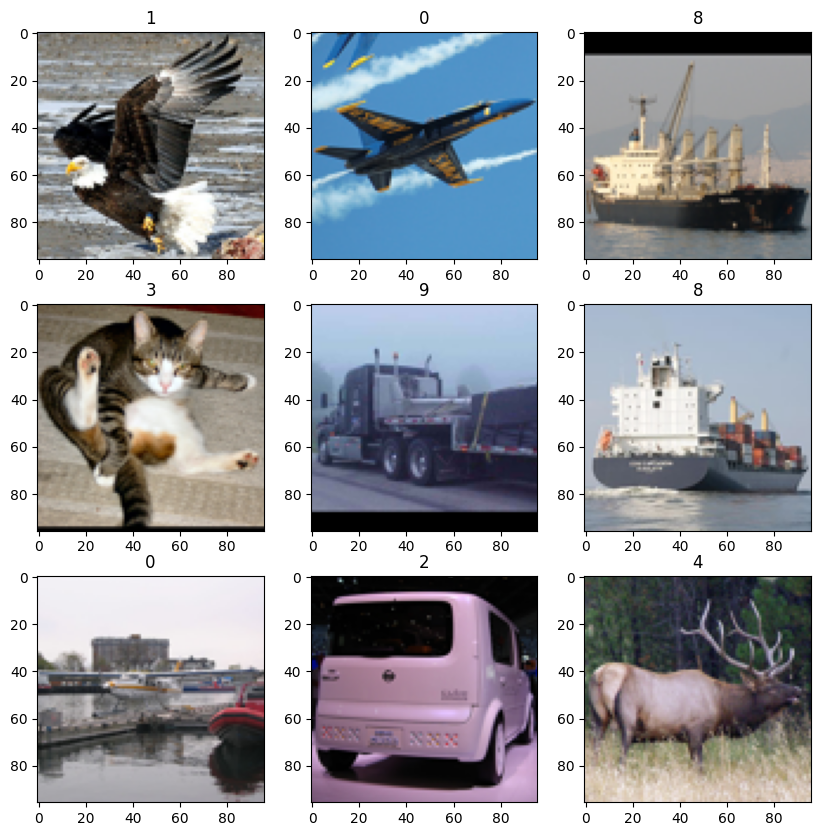

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax[i][j].set_title(train_labels[i * 3 + j])
        ax[i][j].imshow(PIL.Image.fromarray((train_images[i * 3 + j]).astype(np.uint8)))

In [12]:
# Scale images down
DIM = 72

In [13]:
def resize(img):
    img = PIL.Image.fromarray(img)
    img = img.resize((DIM, DIM))
    return np.asarray(img, np.uint8) / 255.0

In [14]:
df_train["image"] = df_train["image"].map(resize)
df_test["image"] = df_test["image"].map(resize)
df_validation["image"] = df_validation["image"].map(resize)

train_images = df_train['image'].to_numpy()
train_labels = df_train['label'].to_numpy()
test_images = df_test['image'].to_numpy()
test_labels = df_test['label'].to_numpy()
validation_images = df_validation['image'].to_numpy()
validation_labels = df_validation['label'].to_numpy()

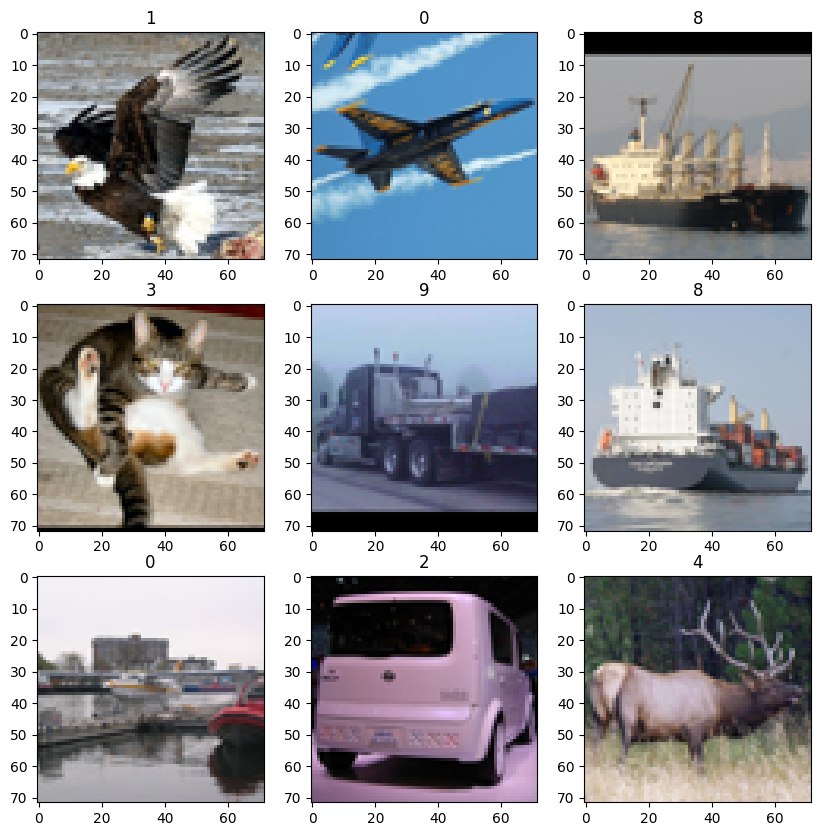

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax[i][j].set_title(train_labels[i * 3 + j])
        ax[i][j].imshow(PIL.Image.fromarray(((train_images[i * 3 + j] * 255).astype(np.uint8))))

# 2. фильтрация данных

In [16]:
CLASSES = [1,3,5,7,9]
# filter images by classes
train_images = [train_images[i] for i in range(len(train_labels)) if train_labels[i] in CLASSES]
train_labels = [train_labels[i] for i in range(len(train_labels)) if train_labels[i] in CLASSES]
test_images = [test_images[i] for i in range(len(test_labels)) if test_labels[i] in CLASSES]
test_labels = [test_labels[i] for i in range(len(test_labels)) if test_labels[i] in CLASSES]
validation_images = [validation_images[i] for i in range(len(validation_labels)) if validation_labels[i] in CLASSES]
validation_labels = [validation_labels[i] for i in range(len(validation_labels)) if validation_labels[i] in CLASSES]

train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)
validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)

In [17]:
set(train_labels)

{1, 3, 5, 7, 9}

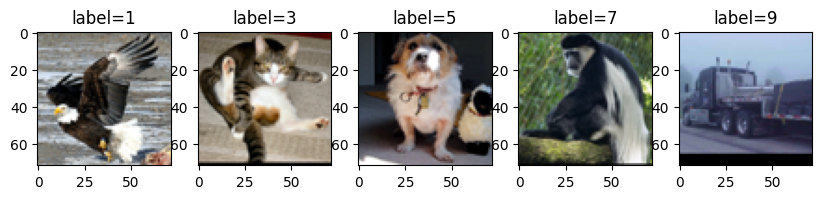

In [18]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
for i in range(5):
    ax[i].set_title('label=' + str(CLASSES[i]))
    first_img_in_class = train_images[train_labels == CLASSES[i]][0]
    ax[i].imshow(first_img_in_class)


# 3. нейросети

CNN

In [19]:
# One-hot encoding
labels = {
    1: [1, 0, 0, 0, 0],
    3: [0, 1, 0, 0, 0],
    5: [0, 0, 1, 0, 0],
    7: [0, 0, 0, 1, 0],
    9: [0, 0, 0, 0, 1]
}
train_labels_categorical = np.array([np.array(labels[label]) for label in train_labels])
test_labels_categorical = np.array([np.array(labels[label]) for label in test_labels])
validation_labels_categorical = np.array([np.array(labels[label]) for label in validation_labels])

In [20]:
train_labels_categorical[0]

array([1, 0, 0, 0, 0])

In [21]:
from keras import layers as L
# 5 convolutional layers, 8 filters of 5x5, using dropout layers
dropout_fac = 0.2

cnn = tf.keras.models.Sequential([
    L.Input(shape=(DIM, DIM, 3)),
])

for i in range(5):
    cnn.add(L.Conv2D(8, kernel_size=(5, 5), activation="relu", padding="same"))
    cnn.add(L.MaxPooling2D(pool_size=(2, 2)))
    cnn.add(L.Dropout(dropout_fac))

cnn.add(L.Flatten())
cnn.add(L.Dense(64, activation="relu"))
cnn.add(L.Dropout(dropout_fac))
cnn.add(L.Dense(5, activation="softmax"))


cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 72, 72, 8)           │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 36, 36, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36, 36, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 36, 36, 8)           │           1,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 18, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 18, 18, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 18, 18, 8)           │           1,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 9, 9, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 9, 9, 8)             │           1,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 8)             │           1,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,477 (37.02 KB)

 Trainable params: 9,477 (37.02 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
early_stop_epoch_start = 20
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True, start_from_epoch=early_stop_epoch_start),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
]
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
cnn_hist = cnn.fit(
    train_images,
    train_labels_categorical,
    validation_data=(validation_images, validation_labels_categorical),
    epochs=200,
    callbacks=callbacks,
    batch_size=32
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 171ms/step - accuracy: 0.2152 - loss: 1.6098 - val_accuracy: 0.3232 - val_loss: 1.5897 - learning_rate: 0.0010
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.2750 - loss: 1.5207 - val_accuracy: 0.3137 - val_loss: 1.4655 - learning_rate: 0.0010
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3423 - loss: 1.4406 - val_accuracy: 0.3212 - val_loss: 1.4298 - learning_rate: 0.0010
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3649 - loss: 1.3564 - val_accuracy: 0.3469 - val_loss: 1.3521 - learning_rate: 0.0010
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3674 - loss: 1.3438 - val_accuracy: 0.3556 - val_loss: 1.3176 - learning_rate: 0.0010
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3802 - loss: 1.2910 - val_accuracy: 0.3563 - val_loss: 1.3465 - learning_rate: 0.0010
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3905 - loss: 1.2769

Transformer network

In [24]:
def data_augmentation(image_size):
    data_augmentation = tf.keras.Sequential(
        [
            L.Normalization(),
            L.Resizing(image_size, image_size),
            L.RandomFlip("horizontal"),
            L.RandomRotation(factor=0.02),
            L.RandomZoom(height_factor=0.2, width_factor=0.2),
        ],
        name="data_augmentation",
    )
    # Compute the mean and the variance of the training data for normalization.
    data_augmentation.layers[0].adapt(train_images)
    return data_augmentation

In [25]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = L.Dense(units, activation='gelu')(x)
        x = L.Dropout(dropout_rate)(x)
    return x

In [26]:
import keras
class Patches(L.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = keras.ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = keras.ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

In [27]:
class PatchEncoder(L.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = L.Dense(units=projection_dim)
        self.position_embedding = L.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = keras.ops.expand_dims(
            keras.ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config

In [28]:
def create_vit_classifier(**params):
    inputs = L.Input(shape=(DIM, DIM, 3))
    # Augment data.
    augmented = data_augmentation(params["image_size"])(inputs)
    # Create patches.
    patches = Patches(params["patch_size"])(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(params["num_patches"], params["projection_dim"])(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(params["transformer_layers"]):
        # Layer normalization 1.
        x1 = L.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = L.MultiHeadAttention(
            num_heads=params["num_heads"], key_dim=params["projection_dim"], dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = L.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = L.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=params["transformer_units"], dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = L.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = L.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = L.Flatten()(representation)
    representation = L.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=params["mlp_head_units"], dropout_rate=0.5)
    # Classify outputs.
    logits = L.Dense(len(CLASSES))(features)
    # Create the Keras model.
    model = tf.keras.Model(inputs=inputs, outputs=logits, name="ViT")
    return model

In [29]:
import os
from pathlib import Path
ch_path = Path(os.path.abspath("")) / "checkpoints"
os.makedirs(ch_path, exist_ok=True)

checkpoint_filepath = ch_path / "ViT_checkpoint.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
)

In [30]:
callbacks.append(checkpoint_callback)

In [31]:
im_size = DIM
p_size = 6
proj_dim = 64
params = dict(
    learning_rate = 0.001,
    weight_decay = 0.0001,
    batch_size = 256,
    num_epochs = 100,  # For real training, use num_epochs=100. 10 is a test value
    image_size = DIM,  # We'll resize input images to this size
    patch_size = 6,  # Size of the patches to be extract from the input images
    num_patches = (DIM // 6) ** 2,
    projection_dim = 64,
    num_heads = 4,
    transformer_units = [
        proj_dim * 2,
        proj_dim,
    ],  # Size of the transformer layers
    transformer_layers = 8,
    mlp_head_units = [
        2048,
        1024,
    ]  # Size of the dense layers of the final classifier
)

In [33]:
vit = create_vit_classifier(**params)

vit.summary()


Model: "ViT"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 72, 72, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ data_augmentation         │ (None, 72, 72, 3)      │              7 │ input_layer_3[0][0]    │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patches_1 (Patches)       │ (None, 144, 108)       │              0 │ data_augmentation[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patch_encoder_1           │ (None, 144, 64)        │         16,192 │ patches_1[0][0]        │
│ (PatchEncoder)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_17    │ (None, 144, 64)        │            128 │ patch_encoder_1[0][0]  │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_8    │ (None, 144, 64)        │         66,368 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_16 (Add)              │ (None, 144, 64)        │              0 │ multi_head_attention_… │
│                           │                        │                │ patch_encoder_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_18    │ (None, 144, 64)        │            128 │ add_16[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 144, 128)       │          8,320 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_34 (Dropout)      │ (None, 144, 128)       │              0 │ dense_23[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 144, 64)        │          8,256 │ dropout_34[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_35 (Dropout)      │ (None, 144, 64)        │              0 │ dense_24[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_17 (Add)              │ (None, 144, 64)        │              0 │ dropout_35[0][0],      │
│                           │                        │                │ add_16[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_19    │ (None, 144, 64)        │            128 │ add_17[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_9    │ (None, 144, 64)        │         66,368 │ layer_normalization_1… │
│ (MultiHeadAttention) 

 Total params: 21,661,644 (82.63 MB)

 Trainable params: 21,661,637 (82.63 MB)

 Non-trainable params: 7 (32.00 B)

In [34]:
optimizer = tf.keras.optimizers.AdamW(
    learning_rate=params["learning_rate"],
    weight_decay=params["weight_decay"]
)

vit.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
    ],
)


In [35]:
train_labels_idx = np.array([CLASSES.index(x) for x in train_labels])
test_labels_idx = np.array([CLASSES.index(x) for x in test_labels])
validation_labels_idx = np.array([CLASSES.index(x) for x in validation_labels])

In [36]:
vit_hist = vit.fit(
    train_images,
    train_labels_idx,
    batch_size=params["batch_size"],
    epochs=params["num_epochs"],
    validation_data=(validation_images, validation_labels_idx),
    callbacks=callbacks,
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.1621 - loss: 6.0854 - val_accuracy: 0.0527 - val_loss: 1.6979 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 765ms/step - accuracy: 0.1698 - loss: 1.8728 - val_accuracy: 0.0764 - val_loss: 1.3942 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.0684 - loss: 1.5966 - val_accuracy: 0.1258 - val_loss: 1.3223 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 611ms/step - accuracy: 0.1997 - loss: 1.4230 - val_accuracy: 0.1555 - val_loss: 1.3174 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 505ms/step - accuracy: 0.1907 - loss: 1.3433 - val_accuracy: 0.1163 - val_loss: 1.2769 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 926ms/step - accuracy: 0.0825 - loss: 1.3421 - val_accuracy: 0.1799 - val_loss: 1.2599 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.1400 - loss: 1.2984 

# 4. матрица ошибок

In [37]:
for model in [cnn, vit]:
    print(model.name)
    train_pred = model.predict(train_images)
    train_pred = np.array([np.argmax(x) for x in train_pred])
    print("Confusion matrix for train data:")
    print(tf.math.confusion_matrix(train_labels_idx, train_pred))
    test_pred = model.predict(test_images)
    test_pred = np.array([np.argmax(x) for x in test_pred])
    print("Confusion matrix for test data:")
    print(tf.math.confusion_matrix(test_labels_idx, test_pred))
    print()

sequential
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Confusion matrix for train data:
tf.Tensor(
[[273  24  49 151   3]
 [ 26 144  66 262   2]
 [ 61  47 174 217   1]
 [ 40  39  60 360   1]
 [ 18  12   5   0 465]], shape=(5, 5), dtype=int32)
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Confusion matrix for test data:
tf.Tensor(
[[236  38  48 190   9]
 [ 48 145  73 218   7]
 [ 72  49 144 264   1]
 [ 43  50  62 330   2]
 [ 20  17   6   5 444]], shape=(5, 5), dtype=int32)

ViT
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step
Confusion matrix for train data:
tf.Tensor(
[[411  17  19  49   4]
 [ 20 347  40  82  11]
 [ 44  38 370  43   5]
 [ 17  34  18 428   3]
 [  2   0   1   1 496]], shape=(5, 5), dtype=int32)
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Confusion matrix for test data:
tf.Tensor(
[[300  52  49  97  23]
 [ 54 208  73 121  35]
 [ 82  99 219 108  22]
 [ 45  69  32 328  13]
 [ 12   9   4  15 452]], shape=(5, 5), dtype=int32)



# 5. кривые обучения

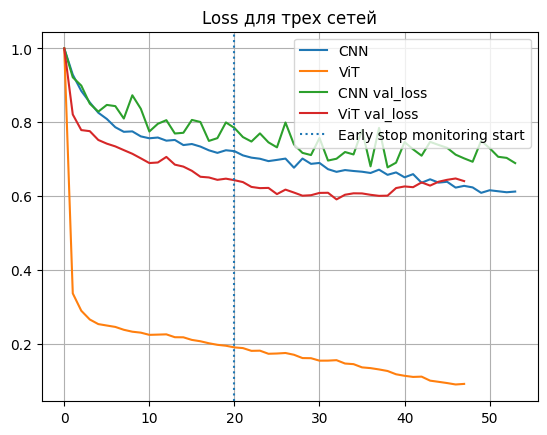

In [40]:
def scale_loss(losses): return np.asarray(losses) / losses[0]
plt.figure()
plt.title("Loss для трех сетей")
plt.plot(scale_loss(cnn_hist.history["loss"]), label="CNN")
plt.plot(scale_loss(vit_hist.history["loss"]), label="ViT")
plt.plot(scale_loss(cnn_hist.history["val_loss"]), label="CNN val_loss")
plt.plot(scale_loss(vit_hist.history["val_loss"]), label="ViT val_loss")

plt.axvline(early_stop_epoch_start, linestyle="dotted", label="Early stop monitoring start")
plt.legend()
plt.grid(True)

# 6. качество классификации

In [45]:
# measure maximum recall
from sklearn.metrics import recall_score

best_model = None
best_score = float("-inf")

for model in [cnn, vit]:
    print(model.name)
    pred = model.predict(test_images)
    pred = np.array([np.argmax(x) for x in pred])
    best_class_score = float('-inf')
    for klass in CLASSES:
        score = recall_score(test_labels_idx, pred, labels=[CLASSES.index(klass)], average="micro")
        if score > best_class_score:
            best_class_score = score

    print(model.name, "score ->", best_class_score)
    if best_class_score > best_score:
        best_score = best_class_score
        best_model = model

print(f"Best score: {best_score}")
best_model.summary()

sequential
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
sequential score -> 0.9024390243902439
ViT
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
ViT score -> 0.9186991869918699
Best score: 0.9186991869918699


Model: "ViT"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 72, 72, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ data_augmentation         │ (None, 72, 72, 3)      │              7 │ input_layer_3[0][0]    │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patches_1 (Patches)       │ (None, 144, 108)       │              0 │ data_augmentation[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patch_encoder_1           │ (None, 144, 64)        │         16,192 │ patches_1[0][0]        │
│ (PatchEncoder)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_17    │ (None, 144, 64)        │            128 │ patch_encoder_1[0][0]  │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_8    │ (None, 144, 64)        │         66,368 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_16 (Add)              │ (None, 144, 64)        │              0 │ multi_head_attention_… │
│                           │                        │                │ patch_encoder_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_18    │ (None, 144, 64)        │            128 │ add_16[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 144, 128)       │          8,320 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_34 (Dropout)      │ (None, 144, 128)       │              0 │ dense_23[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 144, 64)        │          8,256 │ dropout_34[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_35 (Dropout)      │ (None, 144, 64)        │              0 │ dense_24[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_17 (Add)              │ (None, 144, 64)        │              0 │ dropout_35[0][0],      │
│                           │                        │                │ add_16[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_19    │ (None, 144, 64)        │            128 │ add_17[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_9    │ (None, 144, 64)        │         66,368 │ layer_normalization_1… │
│ (MultiHeadAttention) 

 Total params: 64,984,920 (247.90 MB)

 Trainable params: 21,661,637 (82.63 MB)

 Non-trainable params: 7 (32.00 B)

 Optimizer params: 43,323,276 (165.27 MB)